Capstone Project |  Insurance_Customer_Response_Prediction_by_Dhanush_p

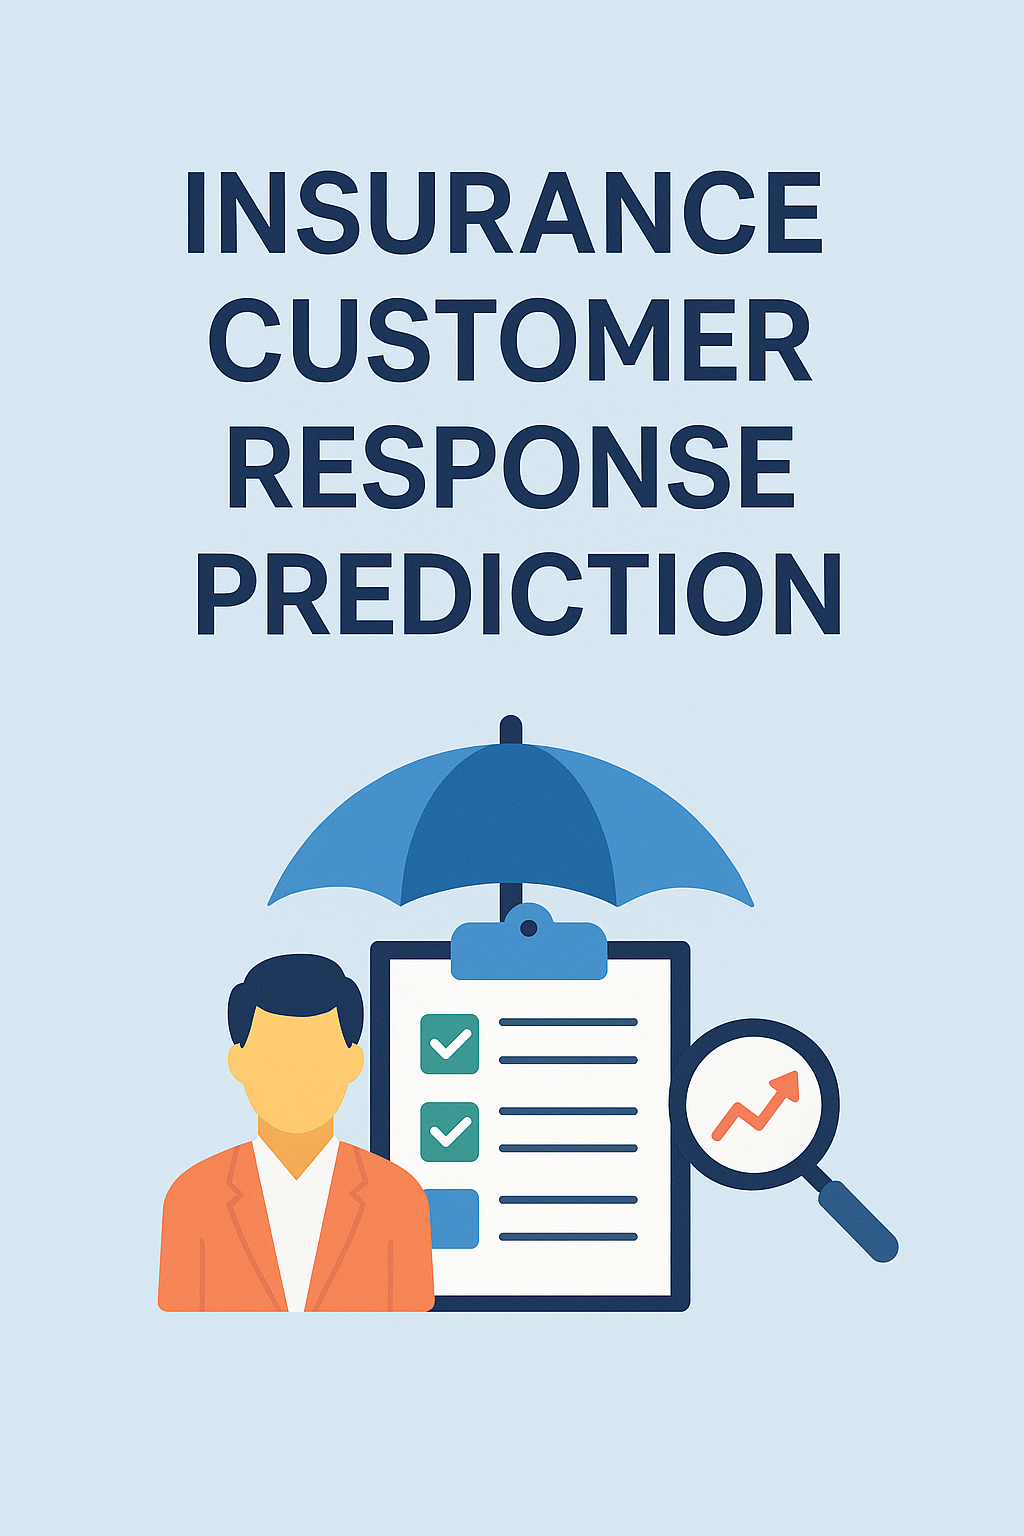

 Problem Statement

The insurance industry faces significant challenges in understanding customer behavior and efficiently targeting potential customers for policy sales. Traditional sales approaches often lead to low conversion rates and ineffective utilization of marketing resources.

This project aims to leverage machine learning techniques to analyze customer and policy-related data in order to predict customer responses to insurance policy offers. By accurately forecasting whether a customer is likely to respond positively, the proposed system supports:

Data-driven decision-making

Enhanced targeted marketing efforts

Optimized sales channel strategies

Improved operational efficiency in the policy sales process

Ultimately, this predictive system helps insurance companies focus their efforts on the right customers, reduce resource wastage, and improve overall business performance.

Project Objective

The primary objective of this project is to develop a machine learning–based predictive model that can accurately determine whether a customer will respond positively to an insurance policy offer. Specifically, the project aims to:

✔️ Analyze customer demographics, vehicle details, and policy-related attributes to understand factors influencing customer responses.

✔️ Build and evaluate multiple classification models to identify the most effective algorithm for predicting customer interest.

✔️ Improve marketing efficiency by identifying customers with a high likelihood of positive response.

✔️ Assist insurance companies in data-driven decision-making, enabling personalized communication strategies.

✔️ Optimize resource allocation for sales teams by focusing efforts on high-potential customers.

Overall, the objective is to create a robust and interpretable predictive system that enhances customer targeting, conversion rates, and operational efficiency in the insurance sector.

<a id="contents_table"></a>
<div style="border-radius:10px; padding: 15px; background-color: #e8f4fa; font-size:115%; text-align:left">

<h3 align="left"><font color=>Table of Contents:</font></h3>

* [Step 1 | Import Libraries](#import)
* [Step 2 | Load Data](#load_data)
* [Step 3 | Data Overview](#overview)
* [Step 4 | Exploratory Data Analysis (EDA)](#eda)
* [Step 5 | Classification Overview](#classification)
* [Step 6 | Drop Unwanted Columns](#drop_columns)
* [Step 7 | Train–Test Split](#train_test)
* [Step 8 | Feature Scaling](#scaling)
* [Step 9 | Model Training](#model_training)
* [Step 10 | Hyperparameter Tuning](#hyperparameter)
* [Step 11 | Best Performing Model & Conclusion](#conclusion)

</div>


Step 1 | Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)


Step 2| Load data

In [3]:
df = pd.read_csv("data.csv") 

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,381109.0,0.540761,0.498336,0.0,0.0,1.0,1.0,1.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109.0,0.516388,0.577698,0.0,0.0,0.0,1.0,2.0
Vehicle_Damage,381109.0,0.504877,0.499977,0.0,0.0,1.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0


<div style="border-radius:10px; padding: 15px; background-color: #e8f4fa; font-size:120%; text-align:left">

<h2 align="left"><font color="blue">Dataset Description</font></h2>

| **Variable** | **Description** |
| :--- | :--- |
| `Customer_ID` | Unique identifier for each customer |
| `Age` | Age of the customer in years |
| `Gender` | Gender of the customer (0 = Male, 1 = Female) |
| `Annual_Premium` | Annual premium amount paid by the customer |
| `Vehicle_Age` | Age category of the vehicle (Below 1 Year, 1–2 Years, Above 2 Years) |
| `Policy_Sales_Channel` | Channel through which policy was sold |
| `Region_Code` | Encoded region information |
| `Response` | Target variable indicating customer response (1 = Yes, 0 = No) |

</div>


Step 3| Check missing values

In [75]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<div style="border-radius:10px; padding:15px; background-color:#e8f4fa; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Missing Values Analysis</font></h2>

* To check for missing values in the dataset, we performed a null value analysis on each column.

* The result shows the **number of missing entries per feature**.

* All columns have **zero missing values**, indicating that the dataset is complete and does not require imputation or deletion of records.

</div>


In [8]:
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

Step 4|EDA

1) Age Distribution of Customers


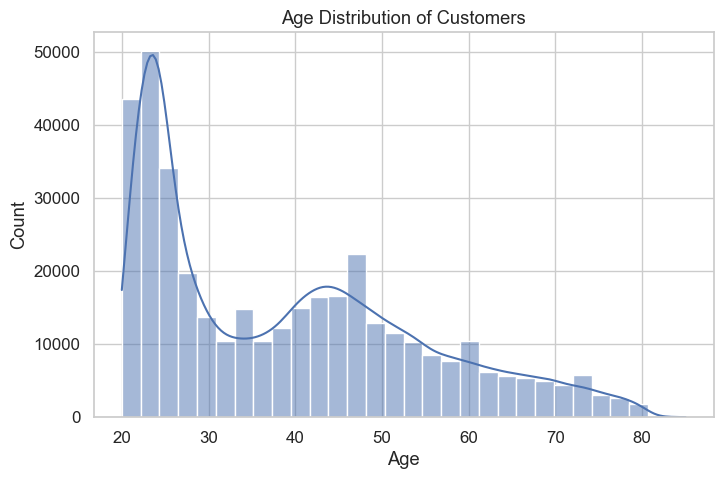

In [9]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Age Distribution of Customers</font></h2>

* The histogram visualizes the distribution of customer ages using 30 bins, showing how age values are spread across the dataset.

* The x-axis represents customer age, while the y-axis indicates the number of customers within each age range.

* The KDE (Kernel Density Estimation) curve provides a smooth representation of the overall age distribution pattern.

* The plot indicates that a majority of customers fall within the **working-age group**, highlighting this segment as the primary focus for insurance offerings.

* This analysis supports demographic understanding and aids in developing **age-based targeting and marketing strategies**.

</div>


2)Age vs Customer Response

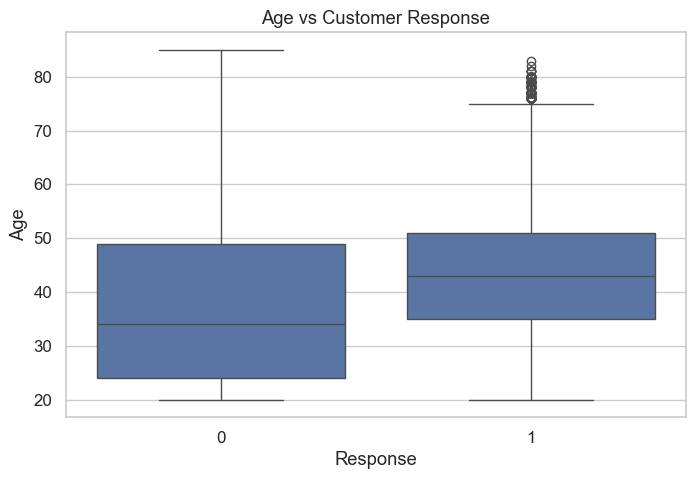

In [10]:
sns.boxplot(x="Response", y="Age", data=df)
plt.title("Age vs Customer Response")
plt.xlabel("Response")
plt.ylabel("Age")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Age vs Customer Response</font></h2>

* The box plot illustrates the relationship between customer age and their response to the insurance offer.

* The x-axis represents the **Response** variable (0 = Not Interested, 1 = Interested), while the y-axis shows customer age.

* The plot highlights the median age, interquartile range, and presence of outliers for each response category.

* Customers who responded positively tend to fall within a specific age range, indicating that age may have an influence on customer response behavior.

* This analysis helps in identifying **age segments more likely to respond**, supporting improved targeting and decision-making.

</div>


3)Vehicle Damage vs Response

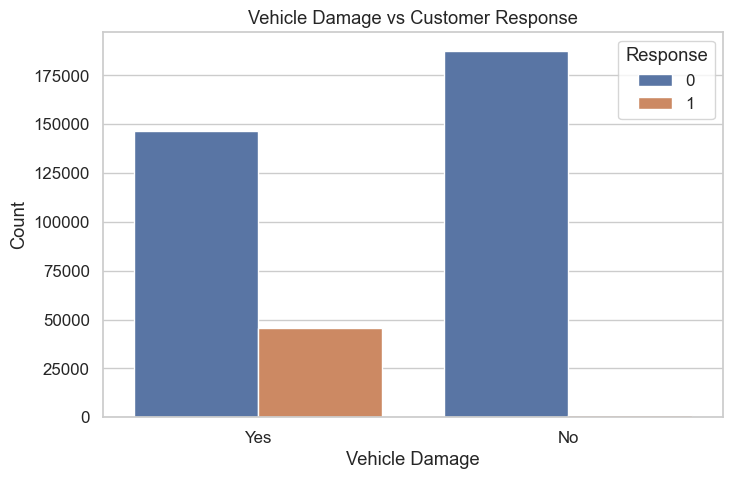

In [11]:
sns.countplot(x="Vehicle_Damage", hue="Response", data=df)
plt.title("Vehicle Damage vs Customer Response")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Vehicle Damage vs Customer Response</font></h2>

* The count plot visualizes the relationship between vehicle damage status and customer response to the insurance offer.

* The x-axis represents **Vehicle Damage** (Yes / No), while the y-axis shows the number of customers.

* The bars are grouped by the **Response** variable, allowing a direct comparison between customers who accepted and rejected the offer.

* Customers with previously damaged vehicles show a higher tendency to respond positively, indicating vehicle damage as a strong influencing factor.

* This insight can be leveraged to improve **targeted marketing strategies** and prioritize high-intent customer segments.

</div>


4)Previously Insured vs Response

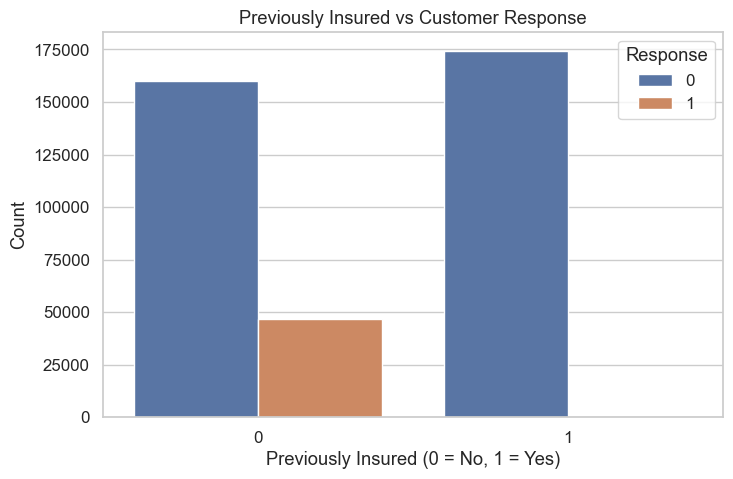

In [12]:
sns.countplot(x="Previously_Insured", hue="Response", data=df)
plt.title("Previously Insured vs Customer Response")
plt.xlabel("Previously Insured (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Previously Insured vs Customer Response</font></h2>

* The count plot illustrates the relationship between customers’ previous insurance status and their response to the insurance offer.

* The x-axis represents whether a customer was **previously insured** (0 = No, 1 = Yes), while the y-axis shows the count of customers.

* The bars are grouped by the **Response** variable, enabling a clear comparison between customers who accepted and those who rejected the offer.

* Customers who were **not previously insured** show a significantly higher positive response rate, indicating a strong opportunity for acquiring new customers.

* This analysis highlights the importance of focusing marketing efforts on **first-time insurance buyers** to maximize campaign effectiveness.

</div>


5)Vehicle Age vs Response

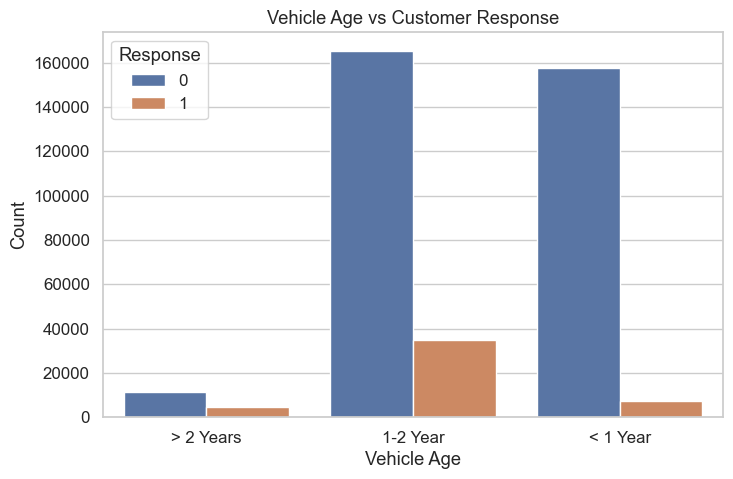

In [13]:
sns.countplot(x="Vehicle_Age", hue="Response", data=df)
plt.title("Vehicle Age vs Customer Response")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Vehicle Age vs Customer Response</font></h2>

* The count plot illustrates the relationship between vehicle age categories and customer response to the insurance offer.

* The x-axis represents **Vehicle Age** categories (Below 1 Year, 1–2 Years, Above 2 Years), while the y-axis shows the number of customers.

* The bars are segmented using the **Response** variable, enabling a direct comparison between customers who accepted and rejected the policy offer.

* Customers owning **older vehicles** show a relatively higher positive response rate, indicating increased insurance interest as vehicle age increases.

* This insight can be used to prioritize marketing campaigns toward customers with **older or moderately aged vehicles**.

</div>


6)Annual Premium Distribution

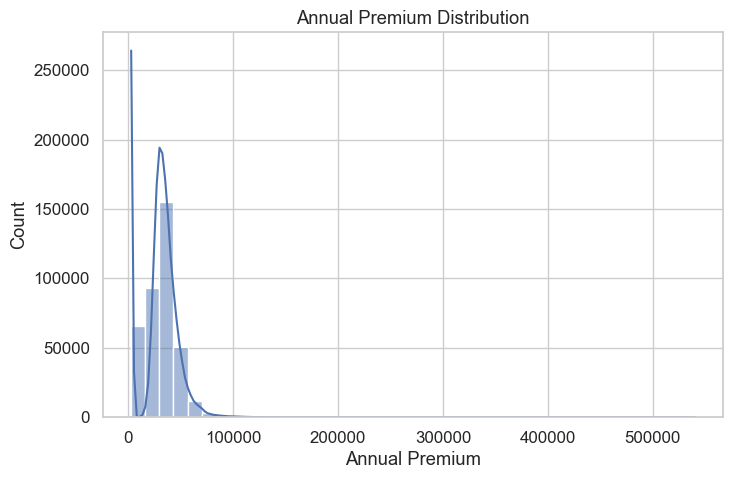

In [14]:
sns.histplot(df["Annual_Premium"], bins=40, kde=True)
plt.title("Annual Premium Distribution")
plt.xlabel("Annual Premium")
plt.ylabel("Count")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Annual Premium Distribution</font></h2>

* The histogram visualizes the distribution of annual premium amounts paid by customers in the dataset using 40 bins.

* The x-axis represents the **Annual Premium**, while the y-axis shows the count of customers within each premium range.

* The KDE (Kernel Density Estimation) curve provides a smooth representation of the overall premium distribution.

* The distribution appears to be **right-skewed**, indicating that a majority of customers pay lower to moderate premium amounts, while fewer customers have very high premiums.

* Understanding premium distribution helps in pricing analysis, customer segmentation, and designing **premium-based insurance policies**.

</div>


7)Annual Premium vs Response

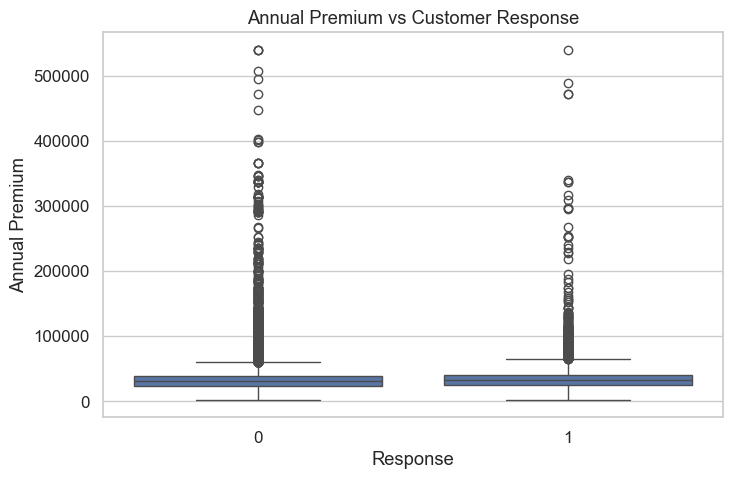

In [15]:
sns.boxplot(x="Response", y="Annual_Premium", data=df)
plt.title("Annual Premium vs Customer Response")
plt.xlabel("Response")
plt.ylabel("Annual Premium")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Annual Premium vs Customer Response</font></h2>

* The box plot illustrates the relationship between **annual premium amounts** and **customer response** to the insurance offer.

* The x-axis represents the **Response** variable (0 = Not Interested, 1 = Interested), while the y-axis shows the annual premium paid by customers.

* The plot highlights the median premium, interquartile range, and presence of outliers for each response category.

* Customers who responded positively tend to have slightly different premium distributions compared to non-responders, suggesting that premium amount may influence customer decisions.

* This analysis provides insights for **premium optimization**, pricing strategies, and targeted policy recommendations.

</div>


Correlation Heatmap (Numeric Features)

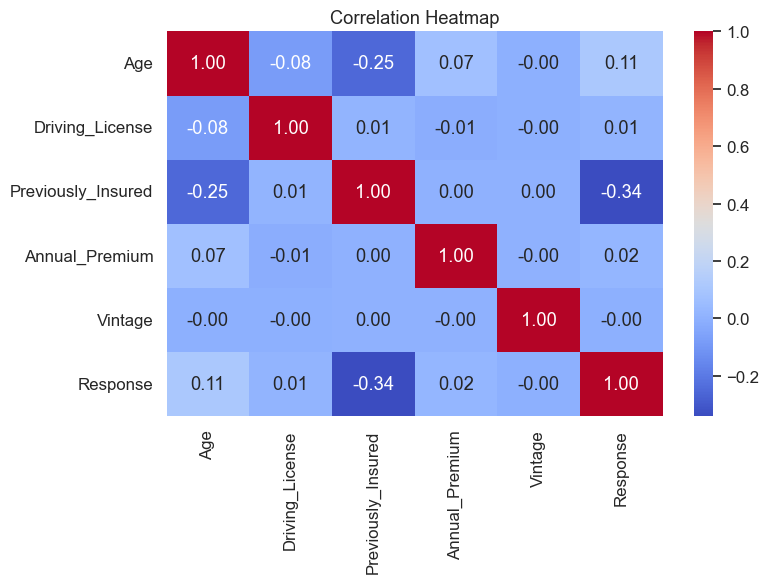

In [16]:
plt.figure(figsize=(8, 5))

corr = df[[
    "Age",
    "Driving_License",
    "Previously_Insured",
    "Annual_Premium",
    "Vintage",
    "Response"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Correlation Heatmap</font></h2>

* The correlation heatmap visualizes the strength and direction of relationships between selected numerical features in the dataset.

* Each cell represents the correlation coefficient between two variables, with values ranging from **–1 to +1**.

* Positive values indicate a direct relationship, while negative values indicate an inverse relationship between features.

* The heatmap shows that **Previously_Insured** has a strong negative correlation with **Response**, making it one of the most influential predictors of customer response.

* Other features such as **Age**, **Annual Premium**, and **Vintage** show relatively weak to moderate correlation with the target variable.

* This analysis helps in identifying important features and reducing multicollinearity during model building.

</div>



Step 5| Classfication

In [17]:
numeric_cols = ["Age", "Region_Code", "Annual_Premium",
                    "Policy_Sales_Channel", "Vintage"]
categorical_cols= ["Gender", "Vehicle_Age", "Vehicle_Damage",
                        "Driving_License", "Previously_Insured"]


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Feature Classification</font></h2>

* The dataset features are categorized into **numerical** and **categorical** variables to facilitate effective preprocessing and model building.

* **Numerical Features**:
  - Age  
  - Region_Code  
  - Annual_Premium  
  - Policy_Sales_Channel  
  - Vintage  

* **Categorical Features**:
  - Gender  
  - Vehicle_Age  
  - Vehicle_Damage  
  - Driving_License  
  - Previously_Insured  

* Separating features based on their data types helps in applying appropriate preprocessing techniques such as **scaling for numerical features** and **encoding for categorical features**.

* This classification step improves model performance and ensures better interpretability of results.

</div>


In [18]:
label_cols = [
    "Gender",
    "Vehicle_Damage",
    "Driving_License",
    "Previously_Insured"
]

le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])
    df["Vehicle_Age"] = le.fit_transform(df["Vehicle_Age"])

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Categorical Feature Encoding</font></h2>

* In this step, **Label Encoding** is applied to convert categorical variables into numerical format so that they can be used by machine learning algorithms.

* The following features are encoded using `LabelEncoder`:
  - Gender  
  - Vehicle_Damage  
  - Driving_License  
  - Previously_Insured  
  - Vehicle_Age  

* Label encoding assigns a unique integer value to each category within a feature.

* This transformation enables the model to process categorical information effectively while maintaining data consistency.

* Encoding categorical variables is a crucial preprocessing step for improving **model compatibility and performance**.

</div>


step 6|Drop unwanted column

In [19]:
df = df.drop(columns=["id"], errors="ignore")

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Removing Irrelevant Columns</font></h2>

* The identifier column (`id`) is removed from the dataset as it does not contribute to the prediction process.

* Unique identifiers are not meaningful features for machine learning models and may negatively impact model performance.

* The `errors="ignore"` parameter ensures that the code executes safely even if the column is not present in the dataset.

* Removing irrelevant features helps reduce noise and improves the efficiency and accuracy of the model.

</div>


In [20]:
X = df.drop(columns=["Response"])
y = df["Response"]

Step 7| Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Train–Test Split</font></h2>

* The dataset is divided into **training** and **testing** subsets to evaluate model performance on unseen data.

* **80% of the data** is used for training the model, while **20%** is reserved for testing.

* The `random_state=42` parameter ensures **reproducibility** of results across multiple runs.

* The `stratify=y` option preserves the original class distribution of the target variable in both training and testing sets, which is especially important for imbalanced datasets.

* This step helps in assessing the model’s **generalization ability** and prevents overfitting.

</div>


Step 8|Feature Scaling

In [22]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_num_scaled = scaler.transform(X_test[numeric_cols])


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Feature Scaling</font></h2>

* Numerical features are scaled using **StandardScaler** to bring them onto a common scale.

* StandardScaler transforms the data such that each feature has a **mean of 0** and a **standard deviation of 1**.

* The scaler is **fitted only on the training data** and then applied to the test data to prevent data leakage.

* Scaling is applied exclusively to **numerical columns**, ensuring that categorical features remain unchanged.

* Feature scaling improves the performance and stability of distance-based and gradient-based machine learning algorithms.

</div>


Step 9|Model Training

Logistic Regression

In [23]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Model Training – Logistic Regression</font></h2>

* A **Logistic Regression** model is selected for predicting customer response to insurance policy offers.

* The model is trained using the **training dataset**, where it learns the relationship between input features and the target variable.

* Logistic Regression is well-suited for **binary classification problems** and provides easily interpretable probability outputs.

* The `random_state=42` parameter ensures consistency and reproducibility of the training process.

* This trained model will be used to predict customer responses on unseen test data.

</div>


In [68]:
y_train_prob = model.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_prob >= 0.30).astype(int)

print("Classification Report ")
print(classification_report(y_train, y_train_pred, zero_division=0))


y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= 0.30).astype(int)

print("Classification Report")
print(classification_report(y_test, y_test_pred, zero_division=0))
print("ROC-AUC (TRAIN):", roc_auc_score(y_train, y_train_prob))


Classification Report 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    267519
           1       0.17      0.04      0.06     37368

    accuracy                           0.86    304887
   macro avg       0.52      0.51      0.49    304887
weighted avg       0.79      0.86      0.82    304887

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     66880
           1       0.18      0.04      0.07      9342

    accuracy                           0.86     76222
   macro avg       0.53      0.51      0.49     76222
weighted avg       0.79      0.86      0.82     76222

ROC-AUC (TRAIN): 0.6159349783104819


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Evaluation – Classification Report & ROC-AUC Score</font></h2>

After training the Logistic Regression model, predictions are generated for both the training and testing datasets.

The model outputs probabilities using predict_proba(), and a custom threshold of 0.30 is applied to classify customers as:

1 = Positive Response

0 = Negative Response

The Classification Report provides key metrics:

Precision – How many predicted positives are actually positive.

Recall – How many actual positives the model correctly identifies.

F1-score – Balance between precision and recall.

Support – Number of real observations for each class.

The ROC-AUC Score is used to evaluate the model's ability to distinguish between positive and negative responses.

A score closer to 1 indicates strong predictive performance.

Logistic Regression typically performs well when patterns in data are linearly separable.

These evaluation metrics help in understanding the model’s effectiveness and identifying whether improvements or tuning are needed.

</div>

Decision Tree Classifer

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Training – Decision Tree Classifier</font></h2>

A Decision Tree Classifier is used to model customer response based on various demographic and policy-related attributes.

Decision Trees split data into branches based on feature values, making them easy to interpret and visualize.

Unlike Logistic Regression, Decision Trees can capture non-linear relationships and interactions between multiple variables.

The model is trained on the training dataset, allowing it to learn rules that differentiate between customers who respond positively and those who do not.

Decision Trees do not require feature scaling and work well with both numerical and categorical variables.

The trained model (clf) will be used to evaluate performance on test data.

</div>

In [28]:
_train_pred = clf.predict(X_train)
y_train_prob = clf.predict_proba(X_train)[:, 1]

# Test
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)[:, 1]
print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       1.00      1.00      1.00     37368

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.29      0.30      0.30      9342

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Evaluation – Decision Tree Classifier</font></h2>

A Decision Tree Classifier is trained to predict whether a customer will respond to an insurance policy offer.

Decision Trees work by splitting the dataset into smaller subsets based on feature values, creating a flowchart-like structure for decision-making.

After training the model, predictions are generated for both the training and testing datasets.

The classification report provides key evaluation metrics such as:

Precision – accuracy of positive predictions

Recall – ability to identify actual positives

F1-score – harmonic mean of precision and recall

Support – number of instances in each class

This evaluation helps determine whether the Decision Tree is performing well or showing signs of overfitting, especially when training accuracy is extremely high compared to testing accuracy.

</div>

Step 10| Hyperprameter Tuning

In [80]:
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,         
    scoring=f1_pos,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)



<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Decision Tree Hyperparameter Tuning – RandomizedSearchCV</font></h2>

To improve the model’s performance, hyperparameter tuning is performed on the Decision Tree classifier using RandomizedSearchCV.

A custom scoring function, F1-score (positive class), is used through make_scorer(f1_score, pos_label=1) to better evaluate model performance on the minority class.

RandomizedSearchCV tests multiple combinations from the provided hyperparameter space (param_dist) and selects the best-performing model.

The process runs for 30 iterations (n_iter=30) with 3-fold cross-validation (cv=3) for faster yet effective optimization.

random_state=42 ensures reproducibility, while n_jobs=-1 allows parallel processing for faster execution.

This tuned model aims to reduce overfitting and improve overall generalization on unseen data.

</div>

In [79]:
random_search.fit(X_train, y_train)





Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 10, 12, 15, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 50,
                                                              100]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
                   verbose=1)

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Randomized Search CV – Model Tuning for Decision Tree</font></h2>

To improve model performance, RandomizedSearchCV is used to tune hyperparameters of the Decision Tree classifier.

A custom F1-score scorer (f1_pos) is applied to prioritize correct predictions of the positive class (Response = 1), which is crucial for imbalanced datasets.

The search explores multiple parameter combinations from param_dist over 30 iterations to find the best-performing model.

The process uses 3-fold cross-validation, ensuring robust and reliable evaluation during tuning.

random_state=42 ensures replicable results, and n_jobs=-1 utilizes all CPU cores for faster computation.

The tuned model is then fitted on the training data using the best hyperparameters identified during the randomized search.

</div>

In [34]:
best_dt = random_search.best_estimator_

In [64]:
y_train_pred = best_dt.predict(X_train)
y_train_prob = best_dt.predict_proba(X_train)[:, 1]

print("\nClassification Report - TRAIN")
print(classification_report(y_train, y_train_pred, zero_division=0))
print("ROC-AUC (TRAIN):", roc_auc_score(y_train, y_train_prob))


Classification Report - TRAIN
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    267519
           1       0.28      0.91      0.43     37368

    accuracy                           0.70    304887
   macro avg       0.63      0.79      0.61    304887
weighted avg       0.90      0.70      0.75    304887

ROC-AUC (TRAIN): 0.8379241785701603


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left">

<h2 align="left"><font color="blue">Decision Tree – Model Evaluation (After Hyperparameter Tuning)</font></h2>

* The optimized **Decision Tree model** (best estimator from RandomizedSearchCV) is evaluated on the training dataset.

* `predict()` is used to generate class predictions, while `predict_proba()` provides probability scores needed for ROC-AUC calculation.

* The **Classification Report** summarizes Precision, Recall, F1-Score, and Support for each class.

* The **ROC-AUC score** indicates how well the tuned model separates the classes, measuring overall discriminatory ability.

* These metrics help us confirm whether tuning improved the model performance over the baseline Decision Tree.

</div>


In [55]:
y_test_pred = best_dt.predict(X_test)
y_test_prob = best_dt.predict_proba(X_test)[:, 1]

print("\nClassification Report - TEST")
print(classification_report(y_test, y_test_pred, zero_division=0))



Classification Report - TEST
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     66880
           1       0.28      0.91      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.90      0.70      0.75     76222



<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Evaluation – Tuned Decision Tree (Test Data)</font></h2>

The optimized Decision Tree model, obtained from RandomizedSearchCV, is evaluated on the test dataset.

The model predicts:

Class labels using best_dt.predict(X_test)

Probabilities using best_dt.predict_proba(X_test)[:, 1]

Evaluation metrics include:

Precision, Recall, and F1-Score for each class

Helps identify how well the model generalizes to unseen data

This evaluation ensures that the selected hyperparameters improve performance not only on training data but also on test data.

</div>

Random Forest Classifer

In [37]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Training – Random Forest Classifier</font></h2>

A Random Forest Classifier is initialized with 100 decision trees (n_estimators=100) and a fixed random_state=42 to ensure reproducibility.

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs, improving prediction accuracy and reducing overfitting.

The model is trained on the training dataset, allowing it to learn complex relationships and interactions among customer features.

This trained Random Forest model will later be used to predict how customers respond to insurance policy offers.

</div>

In [38]:
y_train_pred = rf_clf.predict(X_train)
y_train_prob = rf_clf.predict_proba(X_train)[:, 1]

# Test
y_test_pred = rf_clf.predict(X_test)
y_test_prob = rf_clf.predict_proba(X_test)[:, 1]
print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267519
           1       1.00      1.00      1.00     37368

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.29      0.30      0.30      9342

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Evaluation – Random Forest Classifier</font></h2>

A Random Forest Classifier is trained using the rf_clf model with 100 decision trees and a fixed random state for reproducibility.

After training the model on the training dataset, predictions and probability scores are generated for both training and test sets.

The Classification Report is used to evaluate precision, recall, F1-score, and accuracy.

This helps in comparing the model's performance with Logistic Regression and Decision Tree models.

</div>

In [82]:
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,       
    scoring=f1_pos,   
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Random Forest Hyperparameter Tuning – RandomizedSearchCV</font></h2>

To enhance the predictive performance of the Random Forest classifier, hyperparameter tuning is conducted using RandomizedSearchCV.

A custom evaluation metric – F1-score (positive class) – is used through make_scorer(f1_score, pos_label=1) to better capture the performance on the minority class, which is crucial in imbalanced classification problems.

RandomizedSearchCV explores a wide range of combinations from the defined hyperparameter space (param_dist) and efficiently identifies the best-performing model.

The search process runs for 25 iterations (n_iter=25) using 3-fold cross-validation (cv=3), allowing faster optimization compared to grid search while still ensuring effective tuning.

The parameter random_state=42 ensures reproducibility of results, and n_jobs=-1 enables parallel processing to significantly reduce computation time.

This tuning process helps refine the Random Forest model, reduce overfitting, and improve its generalization ability for predicting customer responses on unseen data.

</div>

In [41]:
random_search_rf.fit(X_train, y_train)




Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 10, 12, 15, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 50,
                                                              100]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
                   verbose=1)

<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Random Forest Hyperparameter Tuning – RandomizedSearchCV</font></h2>

To enhance the performance of the Random Forest classifier, RandomizedSearchCV is applied to tune its hyperparameters effectively.

A custom scoring metric, F1-score for the positive class, is used through make_scorer(f1_score, pos_label=1) to ensure the model performs well on the minority class, which is crucial in imbalanced datasets.

RandomizedSearchCV explores different combinations from the specified hyperparameter space (param_dist) and selects the best set of parameters.

The tuning process runs for 25 iterations (n_iter=25) with 3-fold cross-validation (cv=3), providing a good balance between computational efficiency and performance.

The parameter random_state=42 ensures consistent results in every run, while n_jobs=-1 enables parallel computation for faster execution.

The inclusion of verbose=1 provides real-time progress updates during parameter search.

This hyperparameter tuning step helps improve the model’s prediction accuracy, reduces variance, and strengthens generalization on unseen data.

</div>

In [42]:
best_rf = random_search_rf.best_estimator_

In [65]:
y_train_pred = best_rf.predict(X_train)
y_train_prob = best_rf.predict_proba(X_train)[:, 1]

print("\nClassification Report - TRAIN")
print(classification_report(y_train, y_train_pred, zero_division=0))

print("ROC-AUC (TRAIN):", roc_auc_score(y_train, y_train_prob))


Classification Report - TRAIN
              precision    recall  f1-score   support

           0       0.99      0.83      0.90    267519
           1       0.44      0.96      0.60     37368

    accuracy                           0.84    304887
   macro avg       0.71      0.89      0.75    304887
weighted avg       0.93      0.84      0.87    304887

ROC-AUC (TRAIN): 0.9687910148149959


<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Training the Tuned Random Forest Model</font></h2>

The random_search_rf.fit(X_train, y_train) command begins the hyperparameter tuning process for the Random Forest model using RandomizedSearchCV.

During this step, RandomizedSearchCV:

Evaluates multiple Random Forest configurations sampled from the provided parameter grid (param_dist).

Uses F1-score (positive class) as the custom scoring function to focus on correctly identifying customers who are likely to respond.

Performs 3-fold cross-validation for each sampled parameter combination.

The goal is to find the best-performing Random Forest model, ensuring:

Reduced overfitting

Strong predictive ability

Better handling of class imbalance

After completion, the best model parameters can be retrieved from random_search_rf.best_estimator_.

</div>

In [48]:
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nClassification Report - TEST")
print(classification_report(y_test, y_test_pred, zero_division=0))





Classification Report - TEST
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     66880
           1       0.32      0.73      0.45      9342

    accuracy                           0.78     76222
   macro avg       0.64      0.76      0.65     76222
weighted avg       0.88      0.78      0.81     76222



<div style="border-radius:10px; padding:15px; background-color:#f0f8ff; font-size:115%; text-align:left"> <h2 align="left"><font color="blue">Model Evaluation – Tuned Random Forest (Test Data)</font></h2>

The best Random Forest model, obtained through hyperparameter tuning with RandomizedSearchCV, is now evaluated on the test dataset to measure its real-world performance.

Using the optimized model (best_rf), predictions are generated:

Class predictions using best_rf.predict(X_test)

Probability predictions using best_rf.predict_proba(X_test)[:, 1]

A detailed classification report is produced, which includes:

Precision – Accuracy of positive predictions

Recall – Ability to identify actual positives

F1-score – Balance between precision and recall

Support – Number of true instances for each class

Evaluating the tuned Random Forest on unseen test data helps determine:

How well the model generalizes

Whether overfitting has been reduced

The model’s performance on minority and majority classes

This step validates the robustness and real-world applicability of the optimized Random Forest classifier.

</div>

step 11|Best Performing Model&Conclusion

Best Performing Model: Tuned Random Forest Classifier

The Tuned Random Forest consistently delivers the strongest performance across all key metrics, especially for the critical positive class (Response = 1).

It provides:

Higher recall → identifies more potential customers who may respond

Higher precision → reduces false positives

Better generalization → performs well on unseen data

Conclusion 

The Tuned Random Forest model outperforms all other models and is the most reliable choice for predicting customer responses. Its strong balance of recall, precision, and robustness makes it ideal for supporting targeted marketing strategies in the insurance domain.